## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [72]:
df = pd.read_csv("/content/CC GENERAL.csv")

In [73]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [74]:
df = df.fillna(0)

In [75]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [76]:
# make "CUST_ID" an index to the dataframe beacause the data is unique in the column and to remove the categorical column.
df.set_index('CUST_ID', inplace=True)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [9]:
from sklearn.metrics import silhouette_score

In [19]:
from sklearn.cluster import KMeans
sum2_dist = []
scores = []

for k in range(2,10):
    model = KMeans(n_clusters=k, random_state=60)
    labels = model.fit_predict(scaled_df)
    sum2_dist.append(model.inertia_)
    scores.append(silhouette_score(scaled_df, labels))

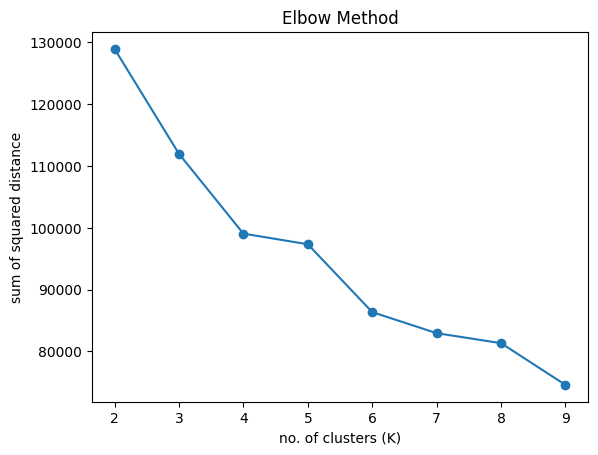

In [20]:
plt.plot(range(2,10), sum2_dist, marker='o')
plt.xlabel('no. of clusters (K)')
plt.ylabel('sum of squared distance')
plt.title('Elbow Method')
plt.show()

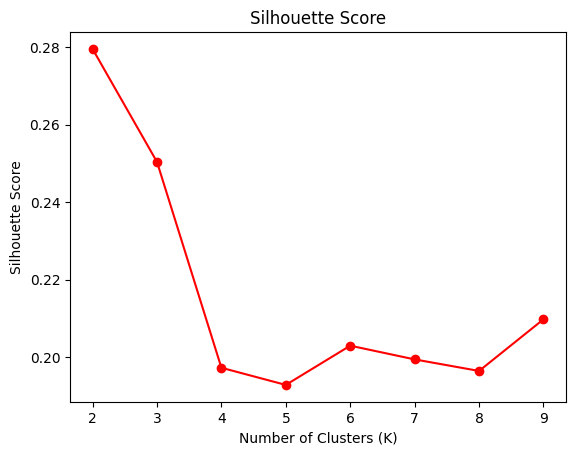

In [21]:
plt.plot(range(2,10), scores, marker='o', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

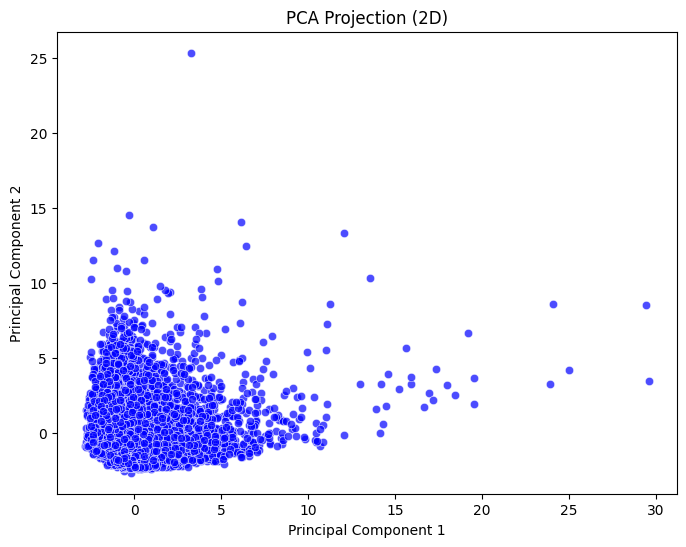

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7, color="blue")  # Plot all points in the same color
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D)")
plt.show()



Choose the optimal K and calculate the silhouette score for the best model.
The PCA shows that the data is group in one cluster and some outliers which can be considered another cluster. Therefore, any attempt to cluster this data into more than 2 clusters will not result in well separted or highly compact clusters.
the sum of of squared distance graph shows and elbow at 4 K=4, however the silhouette score graph shows the highest score at two clusters.
so to compromise between the two scores the optimal K is 3 clusters

From the Silhouette scores graph, the data is best to be clustered into 2 clusters since at k=2 the score was the highest.
Also from the graph the scores are very low for all clusters which means that the dataset is not suitable for clustering

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [31]:
from sklearn.cluster import AgglomerativeClustering
score=[]
for i in range(2,7):
    model = AgglomerativeClustering(n_clusters=i, metric="cosine", linkage="average")
    model = model.fit_predict(scaled_df)
    score.append(silhouette_score(scaled_df,model))

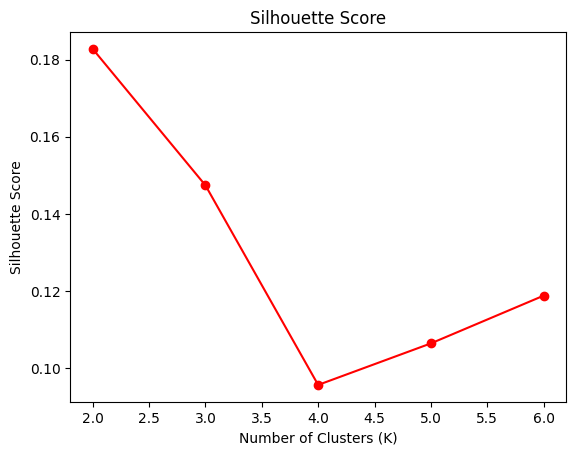

In [37]:
plt.plot(range(2,7), score, marker='o', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
score=[]
for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, metric="euclidean", linkage="single")
    model = model.fit_predict(scaled_df)
    score.append(silhouette_score(scaled_df,model))

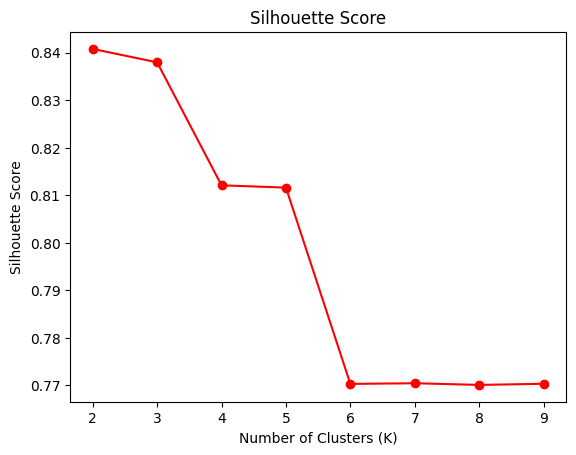

In [42]:
plt.plot(range(2,10), score, marker='o', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Choose the optimal K and calculate the silhouette score for the best model.
The silhouette score for the agglomerative clustering with euclidean affinity and single linkage is better than the agglomerative clustering with cosine affinity and average linkage.

## DBSCAN

Find the optimal DBSCAN model.

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_df)
scores1 = silhouette_score(scaled_df, cluster_labels)
print(scores1)

-0.2486660171857811


In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_df)
scores1 = silhouette_score(scaled_df, cluster_labels)
print(scores1)

0.3970991547619678


In [43]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=7)
cluster_labels = dbscan.fit_predict(scaled_df)
scores1 = silhouette_score(scaled_df, cluster_labels)
print(scores1)

0.47465316498746524


In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=7)
cluster_labels = dbscan.fit_predict(scaled_df)
scores2 = silhouette_score(scaled_df, cluster_labels)
print(scores2)

0.5629498702801259


Find the parameters that optimize the performance of your model and calculate the silhouette score.
From the PCA graph it can be deduced that to obtain better results from the DBscan the eps and the min_samples need to be large enough to not cluster the outliers so we can have two clusters only.
the optimal eps=2.5 and min_smaples=7 which gives the best silhouette score

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?
The best model is the agglomerative with euclidean affinity and single linkage becase it creates to clusters with the highest silhouette score which means that the two cluters are well separarted " better distinction between the clusters".
DBScan also clusters into two clusters however with a lower silhouette score than agglomerative.
lastly, Kmeans is not suitable for clustering this dataset because the silhouette scores are very low which means that the clusters created do not have good separation.